In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from keras.preprocessing.image import load_img

from glob import glob

%matplotlib inline

/home/endi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The images are 101 x 101 pixels and each pixel is classified as either salt or sediment.

$$
\begin{bmatrix}
1 & 102 & ...\\
2 & 103 & ...\\
3 & 104 & ...\\
... & ...\\
101 & 202 & 10201\\
\end{bmatrix}_{101x101}
$$

In [2]:
train_images_f = glob('data/raw/train_images/images/*')
test_images_f = glob('data/raw/test_images/images/*')

# The goal of the competition is to segment regions that contain salt.
train_masks_f = glob('data/raw/train_images/masks/*')
test_masks_f = glob('data/raw/test_images/masks/*')

print(len(train_images_f), len(test_images_f))
print(len(train_masks_f), len(test_masks_f))

4000 18000
4000 0


In [3]:
# In addition to the seismic images, the depth of the imaged location is provided for each image. 
depths = pd.read_csv('data/raw/depths.csv')

In [4]:
depths.head(5)

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [5]:
train = pd.read_csv('data/raw/train.csv')
train.head(5)

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [6]:
#train.loc[train.rle_mask.isna(), ]
train.loc[train.rle_mask.notna(), ]

,id,rle_mask
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...
5,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...
7,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...
8,50d3073821,1 2121 9293 909
10,b5e1371b3b,75 27 175 28 275 29 374 31 474 32 574 33 674 3...
12,b45ad3932e,49 11 149 11 249 11 351 10 452 9 553 9 654 8 7...
14,d4d34af4f7,8788 1414


In [7]:
img_id = 'f950879320'

train.loc[train.id==img_id, 'rle_mask'].values[0]

nan

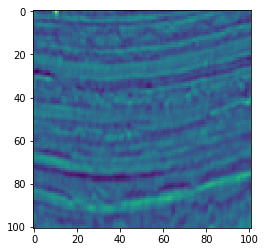

In [8]:
img_fname = 'data/raw/train_images/images/' + img_id + '.png'
mask_fname = 'data/raw/train_images/masks/' + img_id + '.png'

#img_arr = plt.imread(fname)
plt.imshow(np.array(load_img(img_fname, color_mode = "grayscale")) / 255)

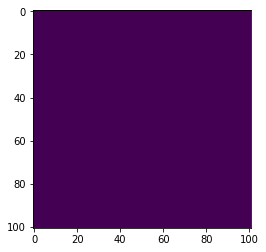

In [9]:
plt.imshow(np.array(load_img(mask_fname, color_mode = "grayscale")) / 255)

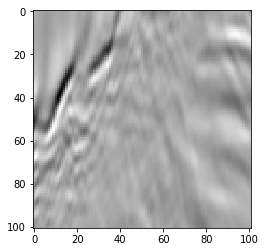

In [45]:
fname = 'data/raw/train_images/masks/' + img_id + '.png'
mask_arr = np.asarray(Image.open(img_fname).convert("L"))
plt.imshow(mask_arr, cmap='gray')

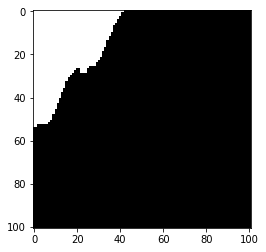

In [46]:
fname = 'data/raw/test_images/images/353e010b7b.png'
mask_arr = np.asarray(Image.open(mask_fname).convert("L"))
plt.imshow(mask_arr, cmap='gray')